In [159]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
from scipy.signal import convolve2d
import random


to array

In [60]:
img_raw =  PIL.Image.open('./images/img.png')
img = np.array(img_raw)

In [61]:
print("(H,W,3)=",img.shape)

(H,W,3)= (512, 512, 3)


In [62]:
img[200,200]

array([127,  49,  90], dtype=uint8)

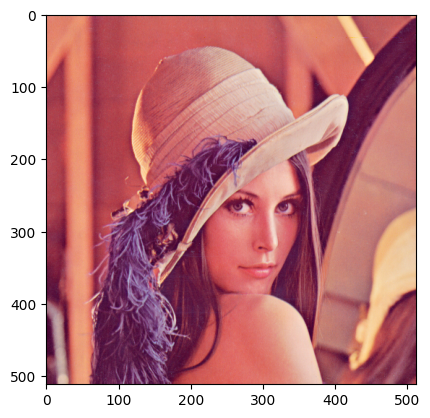

In [98]:
plt.imshow(img)

In [99]:
img[0][0]

array([226, 137, 125], dtype=uint8)

In [108]:
def blur_image(image, kernel_size=20):
    # Define a Gaussian kernel
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
    kernel /= np.sum(kernel)

    # Separate the image into its three color channels
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Apply the kernel to each channel using convolution
    r_blurred = convolve2d(r, kernel, mode='same')
    g_blurred = convolve2d(g, kernel, mode='same')
    b_blurred = convolve2d(b, kernel, mode='same')

    # Combine the blurred channels into a single image
    blurred_image = np.stack([r_blurred, g_blurred, b_blurred], axis=2).astype(np.uint8)
    
    return blurred_image

color channel

In [109]:
def rgb2gray(image):
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    gray = gray.astype(np.uint8)
    return gray
    

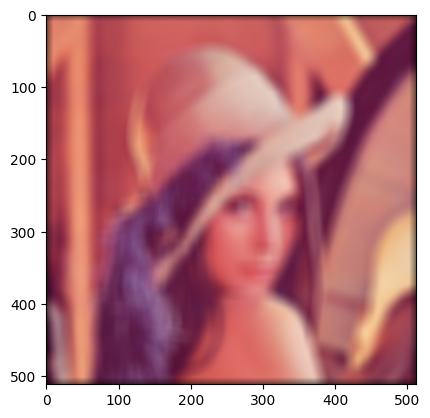

In [110]:
plt.imshow(blur_image(img))


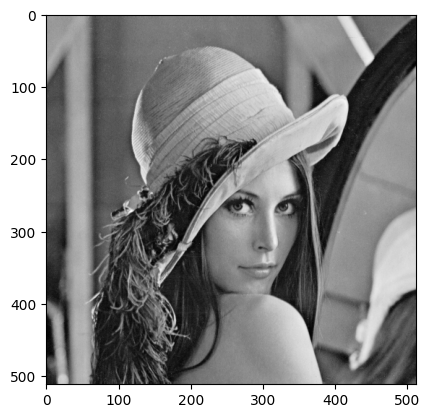

In [105]:
plt.imshow(rgb2gray(img), cmap='gray')

rotate image

In [139]:
def rotate(image, times=1): 
    img = np.rot90(image,times)
    return img


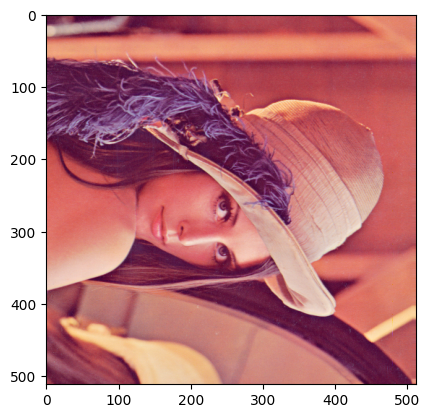

In [156]:
plt.imshow(rotate(img,3))

In [157]:
a= np.array(img)
a = np.resize(a,(512,512))


In [183]:
def add_noise(img):
  
    # Getting the dimensions of the image
    row, col = img.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        img[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to black
        img[y_coord][x_coord] = 0
          
    return img

In [184]:
gray = rgb2gray(img)

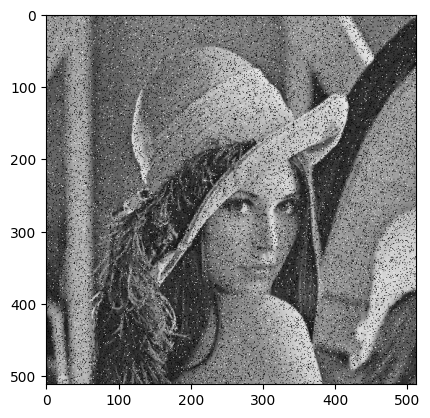

In [186]:
plt.imshow(add_noise(gray), cmap='gray')